## Entrega 2 - Visualizaciones

#### Carga de librerias

In [37]:
import pandas as pd 
import numpy as np 
import os 
from os import listdir
from os.path import isfile, join 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#### Data Set 2 - Predicción de potencia generada por celdas solares
#### Descripción:
El archivo csv contiene 16 columnas. La descripción de cada columna es la siguiente:
- Day or Year: Día del año (0-365)
- Year: Año
- Mounth: Mes
- Day: Día
- First Hour of Period: Hora del día
- is day light: Si hay luz solar (Bool)
- Distance to solar noon: distancia al mediodia solar
- Average temperature (day): Temperatura promedio
- Average wind direction (day): Promedio de direccion del viento
- Average wind speed (day): Pomedio de velocidad del viento
- Sky Cover: Cobertura del cielo
- Visibility: Visibilidad
- Relative Humedity: Humedad Relativa
- Average Wind Speed Period: Promedio de velocidad del viento en ese periodo
- Average Barometric presure: Promedio de presion atmosferica
- Power Generated: Potencia generada


#### Carga de los datos

In [38]:
# Cargamos y presentamos los datos
df_DataSet2 = pd.read_csv('/workspaces/Coder/data/raw/Energia_Solar.csv')
df_DataSet2

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [39]:
# Información del dataset
df_DataSet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

El dataset no presenta nulos
* Posee un Valor Categorico (Is Day Light) Particularmente bool.
* Valores de Fecha como valores enteros, donde el año y Mes tambien pueden ser considerados categoricos y el día un valor discreto.
* El resto de los valores son datos climaticos que nos serviran para estimar la cantidad de potencia generada de las celdas solares:

** Variables discretas: 
Visibilidad (de 1 a 10 (intervalo 1))
Sky Cover (de 1 a 4 (intervalo 1))

** Variables continuas

In [40]:
# Realizamos un describe para analizar las medida de tendencia central de los datos
df_DataSet2.iloc[:,6:16].describe().T

,count,mean,std,min,25%,50%,75%,max
Distance to Solar Noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
Average Temperature (Day),2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
Average Wind Direction (Day),2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
Average Wind Speed (Day),2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
Sky Cover,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000
Visibility,2920.0,9.557705,1.383884,0.000000,10.000000,10.000000,10.000000,10.000000
Relative Humidity,2920.0,73.513699,15.077139,14.000000,65.000000,77.000000,84.000000,100.000000
Average Wind Speed (Period),2919.0,10.129154,7.261547,0.000000,5.000000,9.000000,15.000000,40.000000
Average Barometric Pressure (Period),2920.0,30.017760,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
Power Generated,2920.0,6979.846233,10312.336413,0.000000,0.000000,404.000000,12723.500000,36580.000000


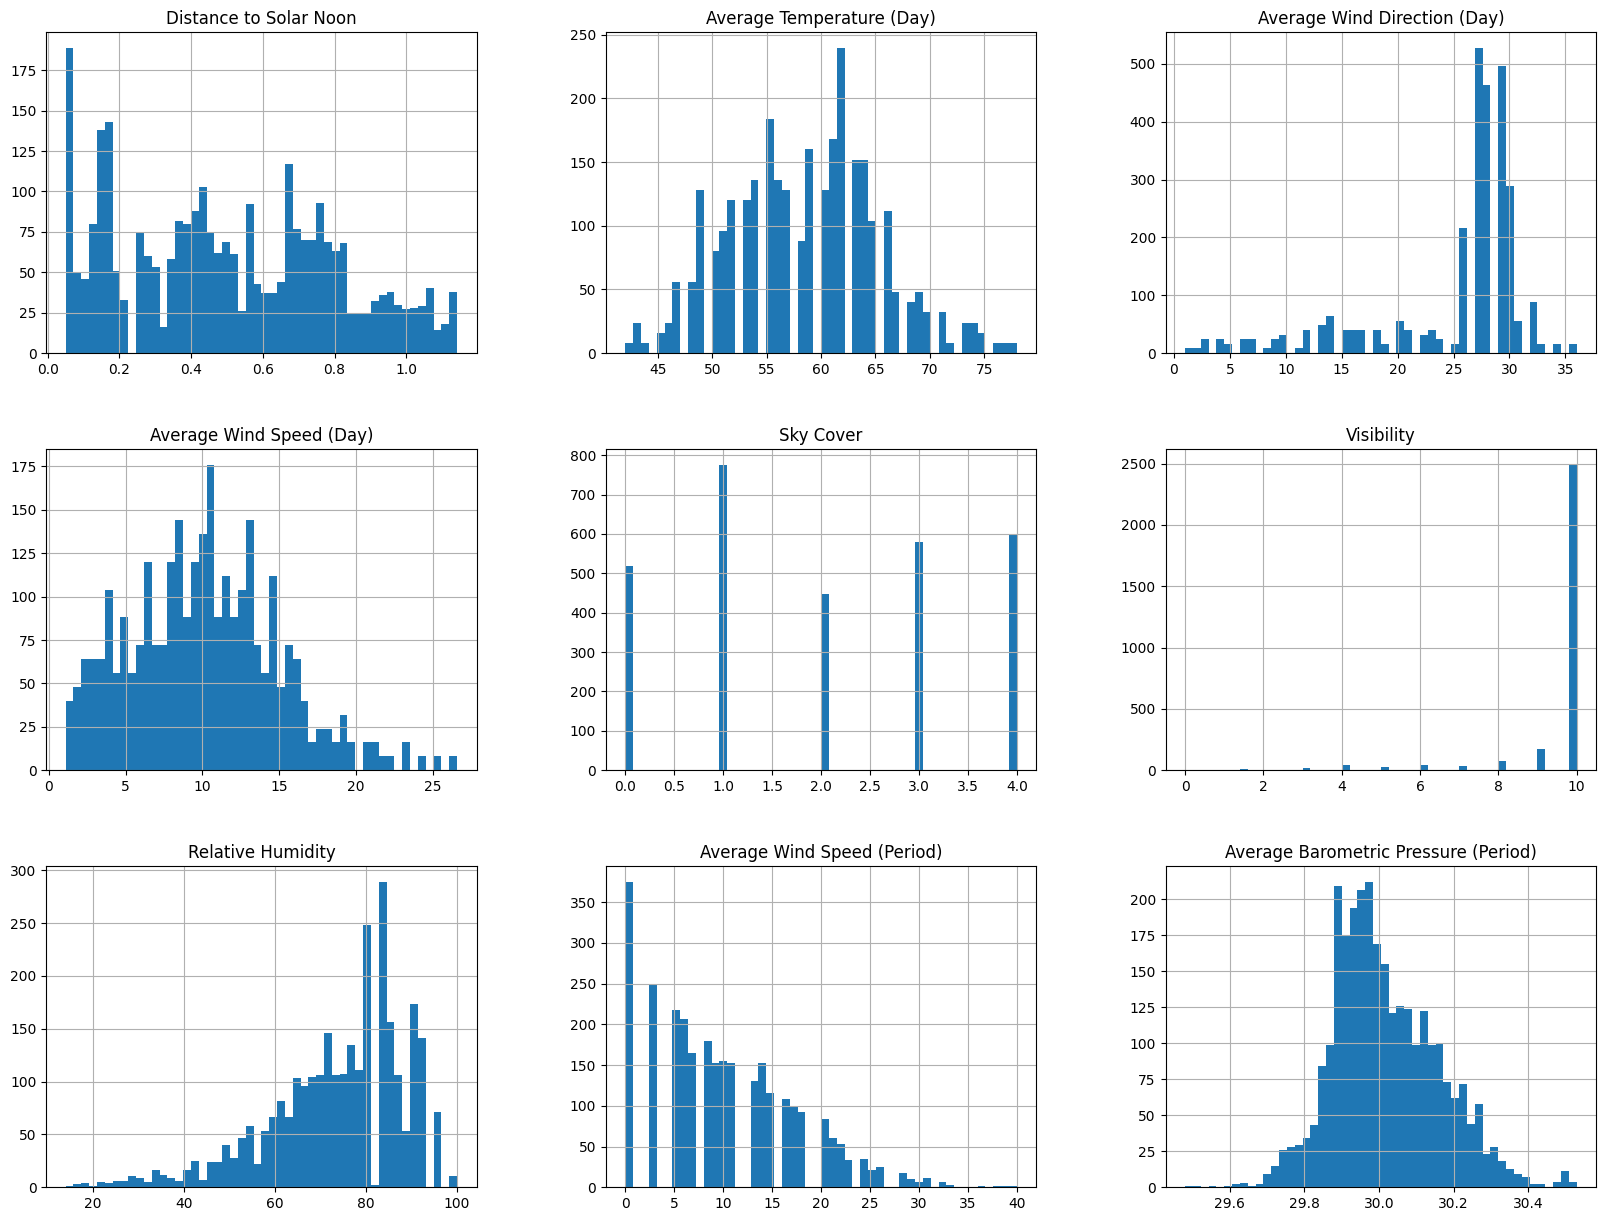

In [43]:
# estudiamos la distribución de cada una de las variables climáticas (variables continuas) que nos podrían ser útiles (a priori) para estimar la potencia generada
df_DataSet2.iloc[:,6:15].hist(bins=50,figsize=(20,15)) 
plt.show()

<AxesSubplot: >

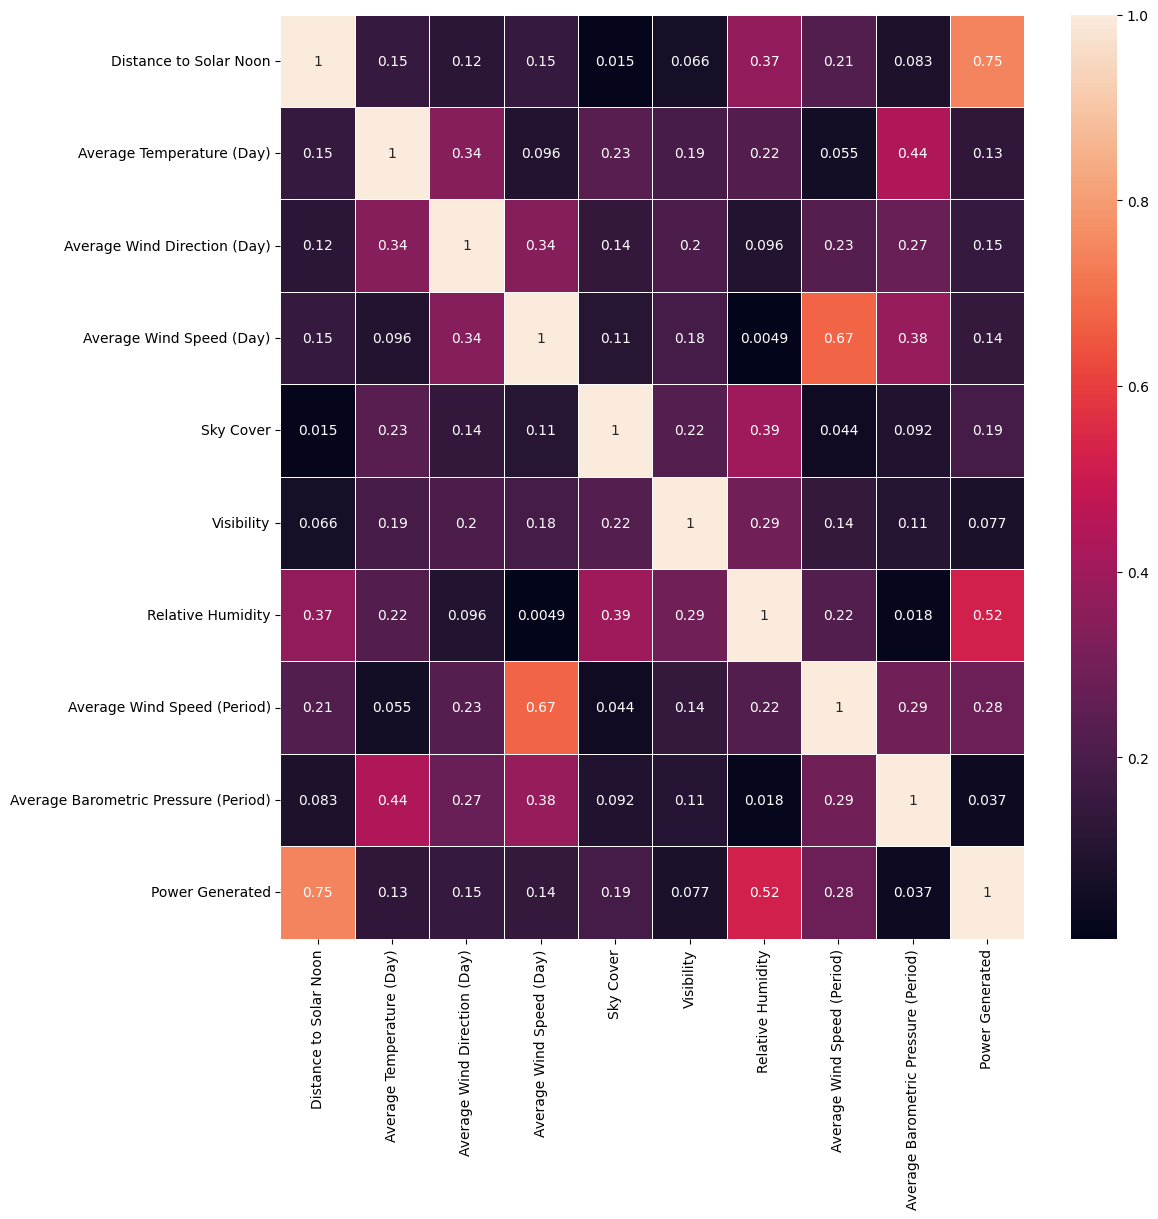

In [41]:
# Vemos la correlación de los datos que tenemos con la potencia
fig1, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_DataSet2.iloc[:,6:16].corr().abs(), annot=True, linewidths=.5, ax=ax)


Podemos observar que la humedad relativa (0.52) y la distancia al mediodía solar (0.75) son las variables más correlacionadas con la potencia.
Entre ellas no se ve una fuerte correlación (0.37) 

In [52]:
#df_Dataset_anio = df_DataSet2.groupby('Year').mean()
#fig, ax = plt.subplots(figsize=(12, 3))  
#ax.plot(df_DataSet2.index, df_DataSet2['Relative Humidity'], hue='Year', label='Precipitaciones de enero')
#ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
#ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Máxima de enero')
#ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='Máxima de febrero')
#ax.legend()